# EDA and Visualization

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

file_path = "monatszahlen2112_verkehrsunfaelle.csv"

df = pd.read_csv(file_path, sep=",", decimal=",")
df.head()

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT
0,Alkoholunfälle,insgesamt,2021,202101,0,28,0,0,NaN
1,Alkoholunfälle,insgesamt,2021,202102,0,40,0,0,NaN
2,Alkoholunfälle,insgesamt,2021,202103,0,27,0,0,NaN
3,Alkoholunfälle,insgesamt,2021,202104,0,26,0,0,NaN
4,Alkoholunfälle,insgesamt,2021,202105,0,40,0,0,NaN


In [2]:
print(df.shape)

(1995, 9)


In [3]:
print(df.columns)

Index(['MONATSZAHL', 'AUSPRAEGUNG', 'JAHR', 'MONAT', 'WERT', 'VORJAHRESWERT',
       'VERAEND_VORMONAT_PROZENT', 'VERAEND_VORJAHRESMONAT_PROZENT',
       'ZWOELF_MONATE_MITTELWERT'],
      dtype='object')


In [4]:
# rename the columns
df = df.rename(columns={
    'MONATSZAHL' : 'Category',
    'AUSPRAEGUNG': 'Accident_Type',
    'JAHR'       : 'Year',
    'MONAT'      : 'Month',
    'WERT'       : 'Value',
    'VORJAHRESWERT' : 'Previous_Year_Value',
    'VERAEND_VORMONAT_PROZENT' : 'Change_Previous_Month_Percentage',
    'VERAEND_VORJAHRESMONAT_PROZENT' : 'Change_Previous_Year_Month_Percentage',
    'ZWOELF_MONATE_MITTELWERT' : 'Average_12_Months',
    })

df.head()

,Category,Accident_Type,Year,Month,Value,Previous_Year_Value,Change_Previous_Month_Percentage,Change_Previous_Year_Month_Percentage,Average_12_Months
0,Alkoholunfälle,insgesamt,2021,202101,0,28,0,0,NaN
1,Alkoholunfälle,insgesamt,2021,202102,0,40,0,0,NaN
2,Alkoholunfälle,insgesamt,2021,202103,0,27,0,0,NaN
3,Alkoholunfälle,insgesamt,2021,202104,0,26,0,0,NaN
4,Alkoholunfälle,insgesamt,2021,202105,0,40,0,0,NaN


In [5]:
# Changing the data type of the columns
df["Change_Previous_Month_Percentage"] = df["Change_Previous_Month_Percentage"].astype("float64")
df["Change_Previous_Year_Month_Percentage"] = df["Change_Previous_Year_Month_Percentage"].astype("float64")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1995 entries, 0 to 1994
Data columns (total 9 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Category                               1995 non-null   object 
 1   Accident_Type                          1995 non-null   object 
 2   Year                                   1995 non-null   int64  
 3   Month                                  1995 non-null   object 
 4   Value                                  1995 non-null   int64  
 5   Previous_Year_Value                    1995 non-null   int64  
 6   Change_Previous_Month_Percentage       1995 non-null   float64
 7   Change_Previous_Year_Month_Percentage  1995 non-null   float64
 8   Average_12_Months                      1764 non-null   float64
dtypes: float64(3), int64(3), object(3)
memory usage: 140.4+ KB
None


In [6]:
df.describe()

,Year,Value,Previous_Year_Value,Change_Previous_Month_Percentage,Change_Previous_Year_Month_Percentage,Average_12_Months
count,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1764.000000
mean,2010.463158,1379.885714,1349.697744,4.421308,1.683178,781.194444
std,6.326381,4565.579360,4484.091626,37.786326,28.808049,1170.929940
min,2000.000000,0.000000,0.000000,-100.000000,-100.000000,12.000000
25%,2005.000000,36.000000,36.000000,-13.005000,-10.680000,41.000000
50%,2010.000000,373.000000,366.000000,0.000000,0.000000,422.000000
75%,2016.000000,844.500000,836.000000,15.690000,9.045000,820.000000
max,2021.000000,46988.000000,46988.000000,600.000000,425.000000,3977.000000


In [7]:
df.describe(include=["object", "bool"])

,Category,Accident_Type,Month
count,1995,1995,1995
unique,3,3,265
top,Verkehrsunfälle,insgesamt,Summe
freq,855,855,147


In [8]:
features = ["Average_12_Months", "Change_Previous_Month_Percentage", "Change_Previous_Year_Month_Percentage", "Previous_Year_Value"]

# consider data before 2021 only
accidents = df[df["Year"] < 2021]
# consider data without summe 
accidents = accidents[accidents["Month"] != "Summe"]
accidents.head()



,Category,Accident_Type,Year,Month,Value,Previous_Year_Value,Change_Previous_Month_Percentage,Change_Previous_Year_Month_Percentage,Average_12_Months
13,Alkoholunfälle,insgesamt,2020,202001,28,22,-20.00,27.27,37.0
14,Alkoholunfälle,insgesamt,2020,202002,40,28,42.86,42.86,38.0
15,Alkoholunfälle,insgesamt,2020,202003,27,34,-32.50,-20.59,37.0
16,Alkoholunfälle,insgesamt,2020,202004,26,36,-3.70,-27.78,36.0
17,Alkoholunfälle,insgesamt,2020,202005,40,39,53.85,2.56,36.0


<AxesSubplot:title={'center':'Number of Accidents per Month (The Problem)'}, xlabel='Month'>

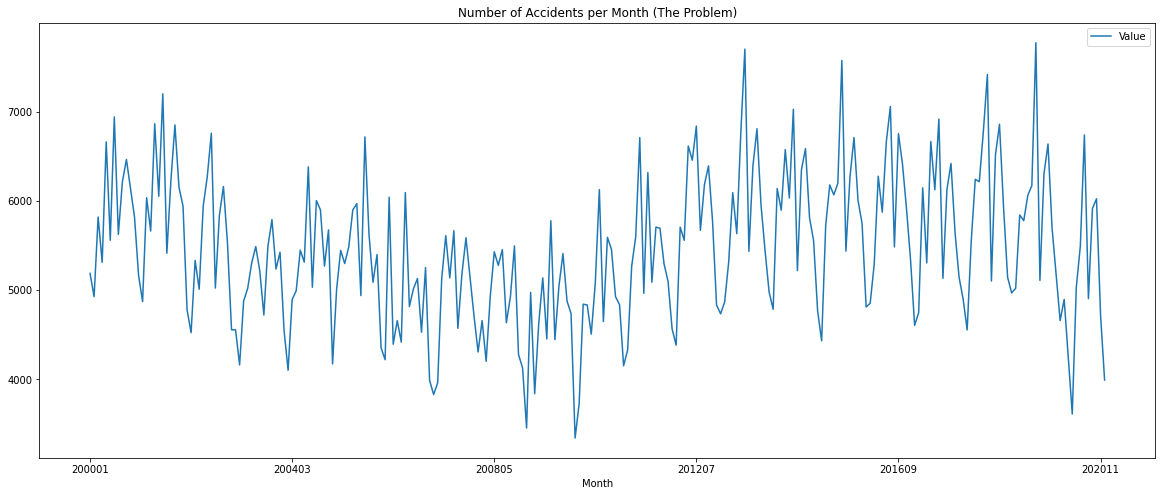

In [9]:
# Plot of accidents sum per month
accidents[["Month", "Value"]].groupby(["Month"]).sum().plot(figsize=(20, 8), title="Number of Accidents per Month (The Problem)")

array([[<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>]], dtype=object)

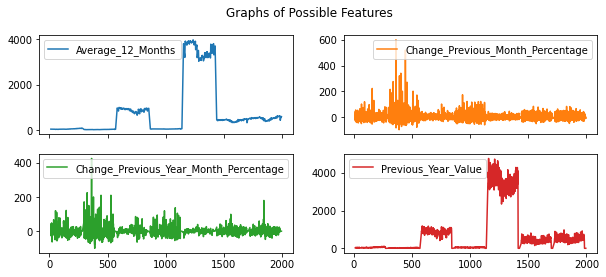

In [10]:
accidents[features].plot(
    subplots=True, layout=(2, 2), figsize=(10, 4), title = "Graphs of Possible Features"
)

<AxesSubplot:title={'center':'Number of Accidents per Year, Category wise'}, xlabel='Year'>

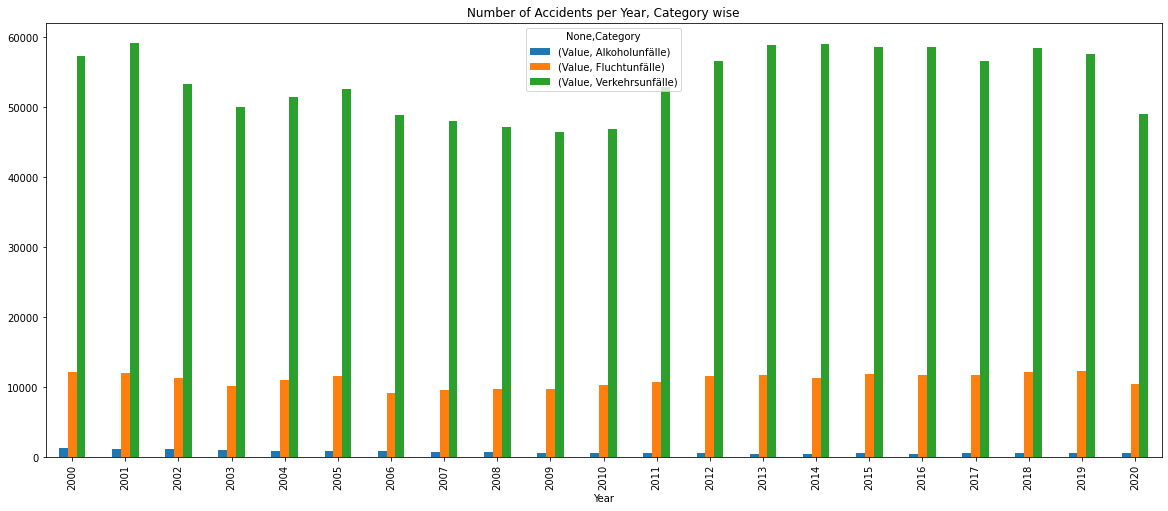

In [11]:
yearwise_accidents = df[df["Month"] == "Summe"]
yearwise_accidents.head()

# plot number of accidents per year, category wise
yearwise_accidents[["Year", "Category", "Value"]].groupby(["Year", "Category"]).sum().unstack().plot(kind = "bar", figsize=(20, 8), title="Number of Accidents per Year, Category wise")

array([[<AxesSubplot:title={'center':'(Value, Alkoholunfälle)'}, xlabel='Year'>,
        <AxesSubplot:title={'center':'(Value, Fluchtunfälle)'}, xlabel='Year'>],
       [<AxesSubplot:title={'center':'(Value, Verkehrsunfälle)'}, xlabel='Year'>,
        <AxesSubplot:xlabel='Year'>]], dtype=object)

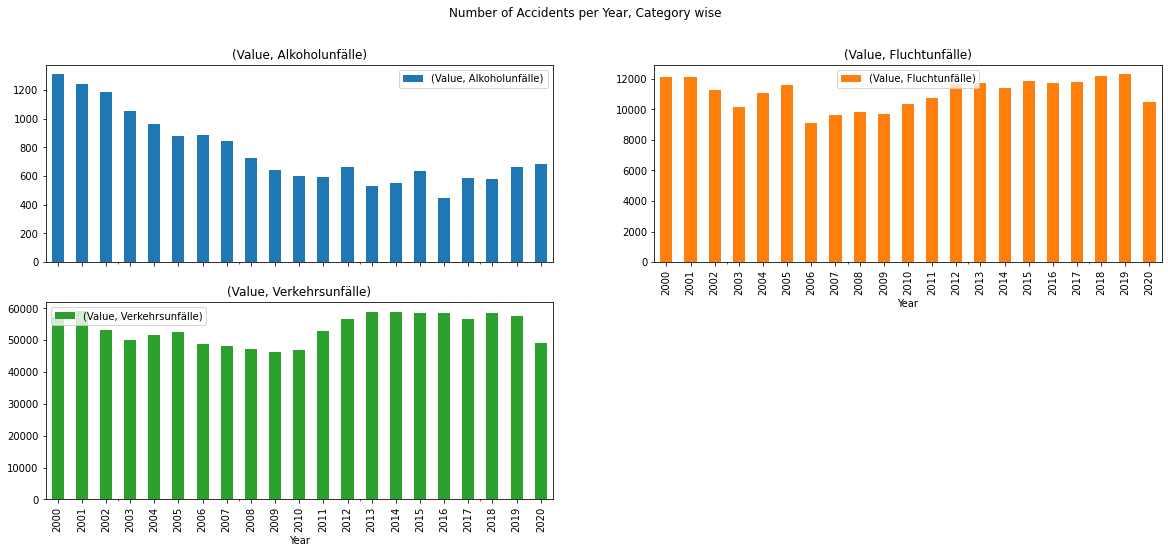

In [12]:
# Bar plots of the number of accidents per year, Category Wise
yearwise_accidents[["Year", "Category", "Value"]].groupby(["Year", "Category"]).sum().unstack().plot(subplots = True, layout = (2,2), kind="bar", figsize=(20, 8), title="Number of Accidents per Year, Category wise")

array([[<AxesSubplot:xlabel='Month'>, <AxesSubplot:xlabel='Month'>],
       [<AxesSubplot:xlabel='Month'>, <AxesSubplot:xlabel='Month'>]],
      dtype=object)

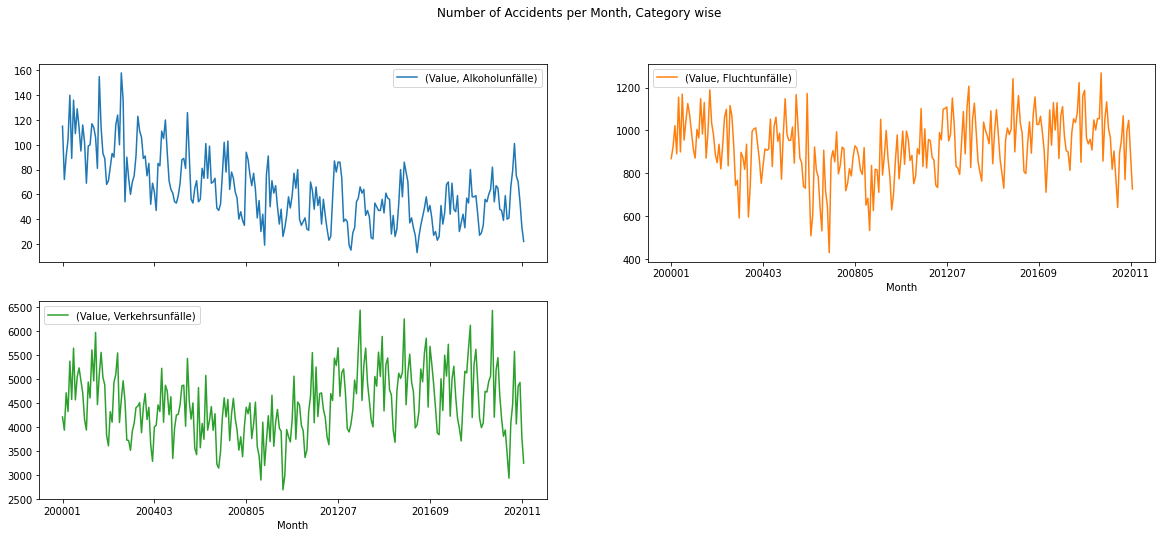

In [13]:
# plot the number of accidents per month, Category Wise
accidents[["Month", "Category", "Value"]].groupby(["Month", "Category"]).sum().unstack().plot(
    subplots=True, layout=(2, 2), figsize=(20, 8), title="Number of Accidents per Month, Category wise"
)

<AxesSubplot:title={'center':'Number of Accidents per Month, Category wise'}, xlabel='Month'>

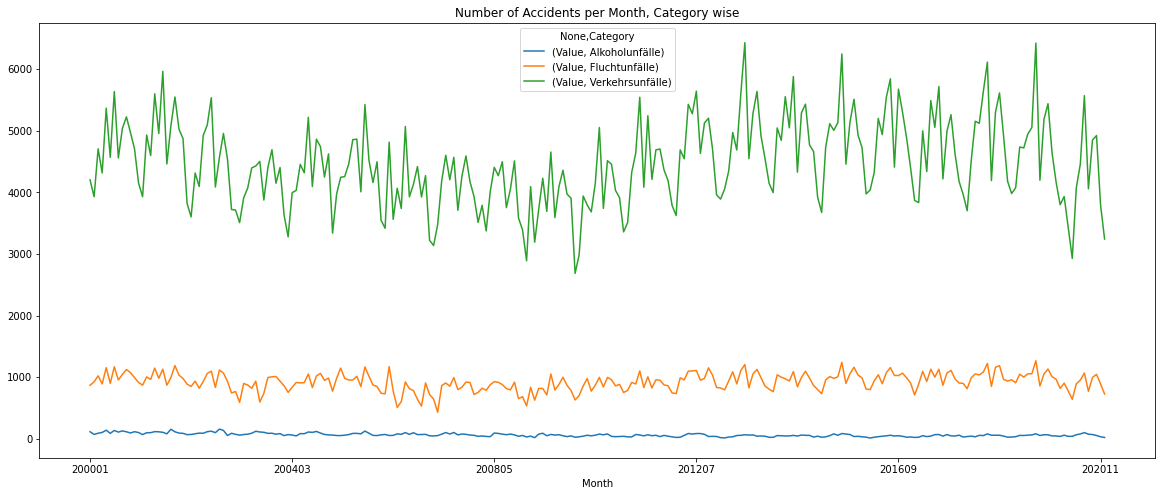

In [14]:
# Plot the number of accidents per month category wise
accidents[["Month", "Category", "Value"]].groupby(["Month", "Category"]).sum().unstack().plot(figsize=(20, 8), title="Number of Accidents per Month, Category wise")

<AxesSubplot:title={'center':'Number of Accidents per Month, Accident Type wise'}, xlabel='Month'>

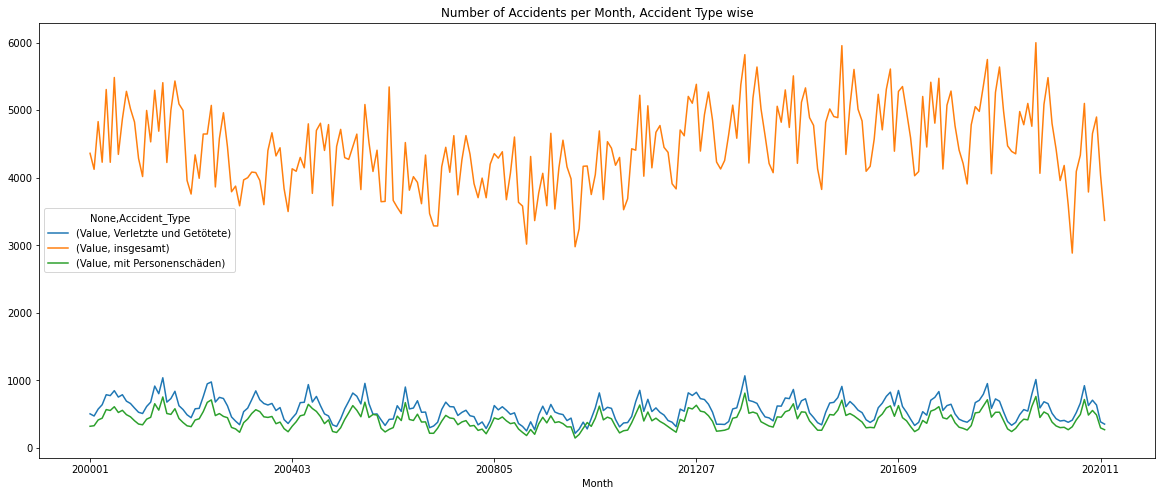

In [15]:
# plot the number of accidents per month per accident type 
accidents[["Month", "Accident_Type", "Value"]].groupby(["Month", "Accident_Type"]).sum().unstack().plot(figsize=(20, 8), title="Number of Accidents per Month, Accident Type wise")

array([[<AxesSubplot:xlabel='Month'>, <AxesSubplot:xlabel='Month'>,
        <AxesSubplot:xlabel='Month'>],
       [<AxesSubplot:xlabel='Month'>, <AxesSubplot:xlabel='Month'>,
        <AxesSubplot:xlabel='Month'>],
       [<AxesSubplot:xlabel='Month'>, <AxesSubplot:xlabel='Month'>,
        <AxesSubplot:xlabel='Month'>]], dtype=object)

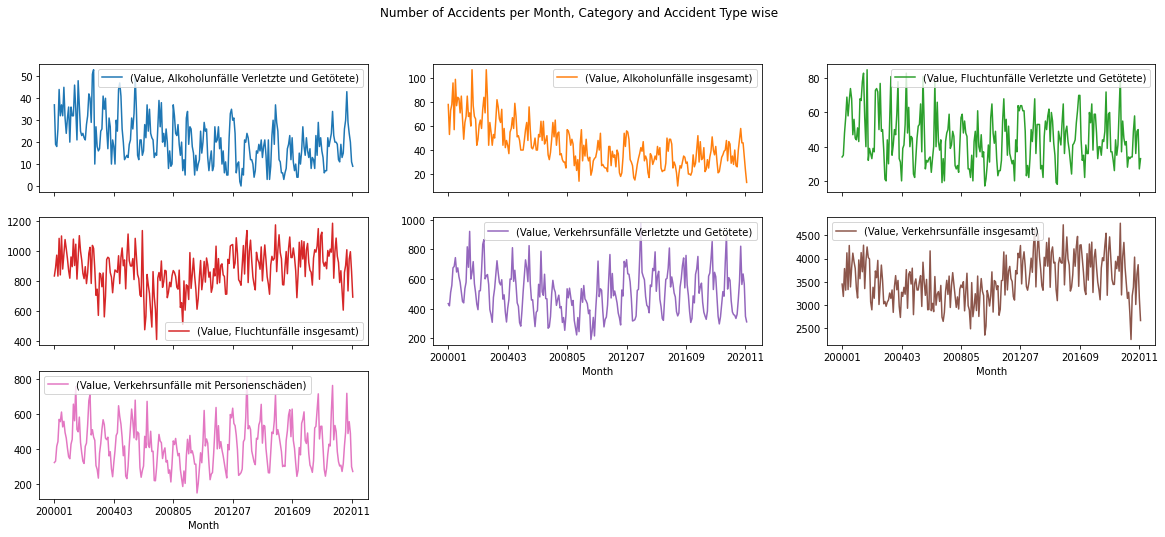

In [16]:
# group category and accident type as one feature
accidents["Category_Accident_Type"] = accidents["Category"] + " " + accidents["Accident_Type"]

# Plot monthly data of accidents per category and accident type
accidents[["Month", "Category_Accident_Type", "Value"]].groupby(["Month", "Category_Accident_Type"]).sum().unstack().plot(
    subplots = True, layout = (3, 3), figsize=(20, 8), title = "Number of Accidents per Month, Category and Accident Type wise"
)

<AxesSubplot:title={'center':'Number of Accidents per Month, Category and Accident Type wise'}, xlabel='Month'>

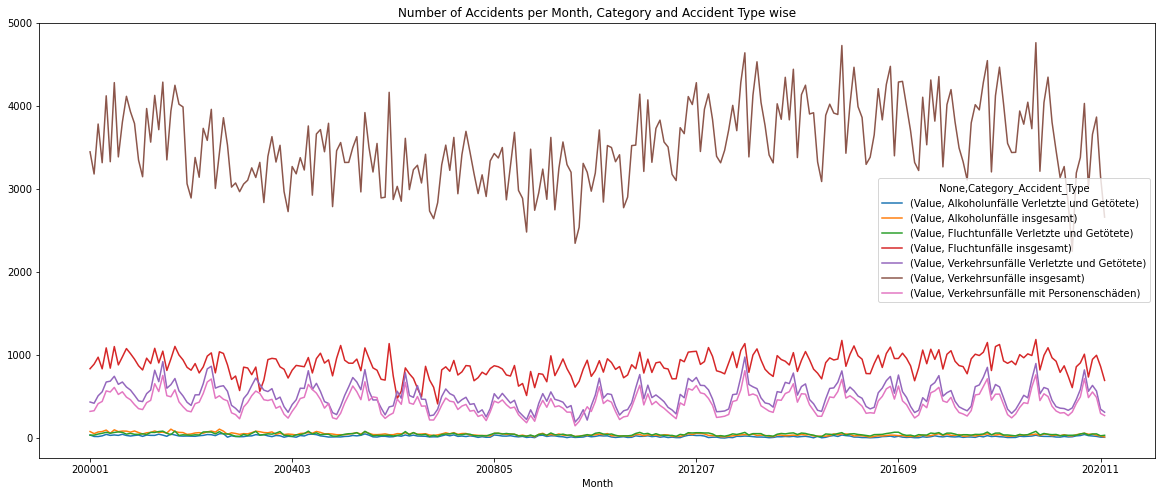

In [17]:
# Combined plot of the same
accidents[["Month", "Category_Accident_Type", "Value"]].groupby(["Month", "Category_Accident_Type"]).sum().unstack().plot(
    figsize=(20, 8), title = "Number of Accidents per Month, Category and Accident Type wise"
)

# Time Series Forecasting

## Preprocessing

In [18]:
# Importing Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics # for the evalution
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

import tensorflow as tf
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

2022-03-27 20:09:04.325003: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-27 20:09:04.325061: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [19]:
# consider data before 2021 only
accidents = df[df["Year"] < 2021]
# consider data without summe 
accidents = accidents[accidents["Month"] != "Summe"]

In [20]:
# label encode Category and Accident_Type
le = LabelEncoder()
accidents["Category"] = le.fit_transform(accidents["Category"])
accidents["Accident_Type"] = le.fit_transform(accidents["Accident_Type"])


In [54]:
validate = accidents[['Category', 'Accident_Type', 'Value']].head(2)

In [22]:
accidents

,Category,Accident_Type,Year,Month,Value,Previous_Year_Value,Change_Previous_Month_Percentage,Change_Previous_Year_Month_Percentage,Average_12_Months
13,0,1,2020,202001,28,22,-20.00,27.27,37.0
14,0,1,2020,202002,40,28,42.86,42.86,38.0
15,0,1,2020,202003,27,34,-32.50,-20.59,37.0
16,0,1,2020,202004,26,36,-3.70,-27.78,36.0
17,0,1,2020,202005,40,39,53.85,2.56,36.0
...,...,...,...,...,...,...,...,...,...
1990,2,0,2000,200008,647,0,-13.04,0.00,584.0
1991,2,0,2000,200009,675,0,4.33,0.00,594.0
1992,2,0,2000,200010,615,0,-8.89,0.00,596.0
1993,2,0,2000,200011,578,0,-6.02,0.00,594.0


In [23]:
# making a custom train set
def custom_ts_multi_data_prep(dataset, target, start, end, window, horizon):
    X = []
    y = []
    for i in range(end-window, start-1, -1):
        indices = range(i-window, i)
        X.append(dataset[indices])

        indicey = range(i+1, i+1+horizon)
        y.append(target[indicey])
        
        
    return np.array(X), np.array(y)

In [24]:
X_scaler = MinMaxScaler()
Y_scaler = MinMaxScaler()

X_scaled = X_scaler.fit_transform(accidents[['Category', 'Accident_Type', 'Month']])
Y_scaled = Y_scaler.fit_transform(accidents[['Value']])

accidents_train = accidents[accidents["Year"] < 2020]
accidents_vali = accidents[accidents["Year"] == 2020]


# scale the data 
X_train_data = X_scaled[accidents["Year"] < 2020]
Y_train_data = Y_scaled[accidents["Year"] < 2020]

X_vali_data = X_scaled[accidents["Year"] == 2020]
Y_vali_data = Y_scaled[accidents["Year"] == 2020]


In [25]:
X_train_data

array([[0.        , 0.5       , 0.94480358],
       [0.        , 0.5       , 0.94530085],
       [0.        , 0.5       , 0.94579811],
       ...,
       [1.        , 0.        , 0.00447539],
       [1.        , 0.        , 0.00497265],
       [1.        , 0.        , 0.00546992]])

In [26]:
hist_window = 12
horizon = 2
class_size = 240

# add each class data to train
x_train, y_train = custom_ts_multi_data_prep(X_train_data, Y_train_data, 0, class_size, hist_window, horizon)

for i in range(1, 7):
    x_train_temp, y_train_temp = custom_ts_multi_data_prep(X_train_data, Y_train_data, i*class_size, (i+1)*class_size, hist_window, horizon)
    x_train = np.concatenate((x_train, x_train_temp), axis=0)
    y_train = np.concatenate((y_train, y_train_temp), axis=0)

x_vali, y_vali = custom_ts_multi_data_prep(X_vali_data, Y_vali_data, 0, 12, hist_window, horizon)

for i in range(1, 7):
    x_vali_temp, y_vali_temp = custom_ts_multi_data_prep(X_vali_data, Y_vali_data, i*12 , (i+1)*12 , hist_window, horizon)
    x_vali = np.concatenate((x_vali, x_vali_temp), axis=0)
    y_vali = np.concatenate((y_vali, y_vali_temp), axis=0)


In [27]:
x_train

array([[[0.00000000e+00, 5.00000000e-01, 4.97265042e-02],
        [0.00000000e+00, 5.00000000e-01, 5.02237693e-02],
        [0.00000000e+00, 5.00000000e-01, 5.07210343e-02],
        ...,
        [0.00000000e+00, 5.00000000e-01, 5.42018896e-02],
        [0.00000000e+00, 5.00000000e-01, 5.46991546e-02],
        [0.00000000e+00, 5.00000000e-01, 5.51964197e-02]],

       [[0.00000000e+00, 5.00000000e-01, 1.04922924e-01],
        [0.00000000e+00, 5.00000000e-01, 4.97265042e-02],
        [0.00000000e+00, 5.00000000e-01, 5.02237693e-02],
        ...,
        [0.00000000e+00, 5.00000000e-01, 5.37046246e-02],
        [0.00000000e+00, 5.00000000e-01, 5.42018896e-02],
        [0.00000000e+00, 5.00000000e-01, 5.46991546e-02]],

       [[0.00000000e+00, 5.00000000e-01, 1.04425659e-01],
        [0.00000000e+00, 5.00000000e-01, 1.04922924e-01],
        [0.00000000e+00, 5.00000000e-01, 4.97265042e-02],
        ...,
        [0.00000000e+00, 5.00000000e-01, 5.32073595e-02],
        [0.00000000e+00, 5.00

In [28]:
# size of the training set
x_train.shape

(1603, 12, 3)

In [29]:
print ('Multiple window of past history\n')
print(x_train[0])

print ('\n Target horizon\n')
print (y_train[0])

Multiple window of past history

[[0.         0.5        0.0497265 ]
 [0.         0.5        0.05022377]
 [0.         0.5        0.05072103]
 [0.         0.5        0.0512183 ]
 [0.         0.5        0.05171556]
 [0.         0.5        0.05221283]
 [0.         0.5        0.05271009]
 [0.         0.5        0.05320736]
 [0.         0.5        0.05370462]
 [0.         0.5        0.05420189]
 [0.         0.5        0.05469915]
 [0.         0.5        0.05519642]]

 Target horizon

[[0.01112744]
 [0.01532647]]


# Training with LSTM

In [30]:
batch_size = 256
buffer_size = 150

train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.cache().shuffle(buffer_size).batch(batch_size).repeat()

val_data = tf.data.Dataset.from_tensor_slices((x_vali, y_vali))
val_data = val_data.batch(batch_size).repeat()

2022-03-26 23:13:22.349647: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-03-26 23:13:22.349709: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-03-26 23:13:22.349743: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (fedora): /proc/driver/nvidia/version does not exist
2022-03-26 23:13:22.350551: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [31]:
lstm_model = tf.keras.models.Sequential([
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(200, return_sequences=True), 
                               input_shape=x_train.shape[-2:]),
    tf.keras.layers.Dense(20, activation='tanh'),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(150)),
    tf.keras.layers.Dense(20, activation='tanh'),
    tf.keras.layers.Dense(20, activation='tanh'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(units=horizon),
])
lstm_model.compile(optimizer='adam', loss='mse')

In [32]:
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 12, 400)          326400    
 l)                                                              
                                                                 
 dense (Dense)               (None, 12, 20)            8020      
                                                                 
 bidirectional_1 (Bidirectio  (None, 300)              205200    
 nal)                                                            
                                                                 
 dense_1 (Dense)             (None, 20)                6020      
                                                                 
 dense_2 (Dense)             (None, 20)                420       
                                                                 
 dropout (Dropout)           (None, 20)                0

In [33]:
model_path = 'Bidirectional_LSTM_Multivariate.h5'
early_stopings = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='min')
checkpoint =  tf.keras.callbacks.ModelCheckpoint(model_path, monitor='val_loss', save_best_only=True, mode='min', verbose=0)
callbacks=[early_stopings,checkpoint]

In [34]:
history = lstm_model.fit(train_data,epochs=150,steps_per_epoch=100,validation_data=val_data,validation_steps=50,verbose=1,callbacks=callbacks)

Epoch 1/150
100/100 [==============================] - 22s 180ms/step - loss: 0.0526 - val_loss: 0.0730
Epoch 2/150
100/100 [==============================] - 17s 173ms/step - loss: 0.0280 - val_loss: 0.0597
Epoch 3/150
100/100 [==============================] - 17s 172ms/step - loss: 0.0132 - val_loss: 0.1384
Epoch 4/150
100/100 [==============================] - 17s 171ms/step - loss: 0.0100 - val_loss: 0.1389
Epoch 5/150
100/100 [==============================] - 17s 172ms/step - loss: 0.0074 - val_loss: 0.0968
Epoch 6/150
100/100 [==============================] - 17s 172ms/step - loss: 0.0069 - val_loss: 0.1463
Epoch 7/150
100/100 [==============================] - 18s 177ms/step - loss: 0.0090 - val_loss: 0.1414
Epoch 8/150
100/100 [==============================] - 17s 173ms/step - loss: 0.0061 - val_loss: 0.1427
Epoch 9/150
100/100 [==============================] - 19s 188ms/step - loss: 0.0064 - val_loss: 0.1395
Epoch 10/150
100/100 [==============================] - 19s 187m

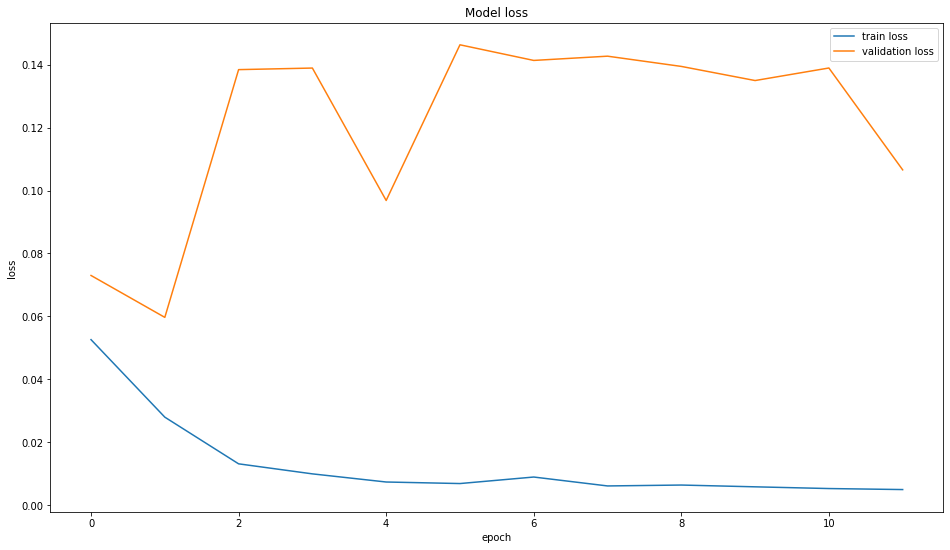

In [35]:
plt.figure(figsize=(16,9))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'])
plt.show()

In [36]:
# save the model
lstm_model.save('./lstm_model')

2022-03-26 23:17:06.264164: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: ./lstm_model2/assets


INFO:tensorflow:Assets written to: ./lstm_model2/assets


In [30]:
# load the model
lstm_model = tf.keras.models.load_model('./lstm_model')

2022-03-27 20:09:37.626598: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-03-27 20:09:37.626643: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-03-27 20:09:37.626658: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (fedora): /proc/driver/nvidia/version does not exist
2022-03-27 20:09:37.626809: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [59]:
data_val = X_scaled[2:14]
val_rescaled = data_val.reshape(1, data_val.shape[0], data_val.shape[1])

pred = lstm_model.predict(val_rescaled)
pred

array([[0.00963563, 0.01318147]], dtype=float32)

In [58]:
pred_Inverse = Y_scaler.inverse_transform(pred)
pred_Inverse

array([[45.894493, 62.783344]], dtype=float32)

In [57]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [56]:
pred_Inverse[0]

array([45.894493, 62.783344], dtype=float32)

In [55]:
validate['Value']

13    28
14    40
Name: Value, dtype: int64

In [53]:
timeseries_evaluation_metrics_func(validate['Value'].head(2),pred_Inverse[0])

Evaluation metric results:-
MSE is : 419.6468297424508
MAE is : 20.338918685913086
RMSE is : 20.485283247796474
MAPE is : 60.43363230569021
R2 is : -10.656856381734745



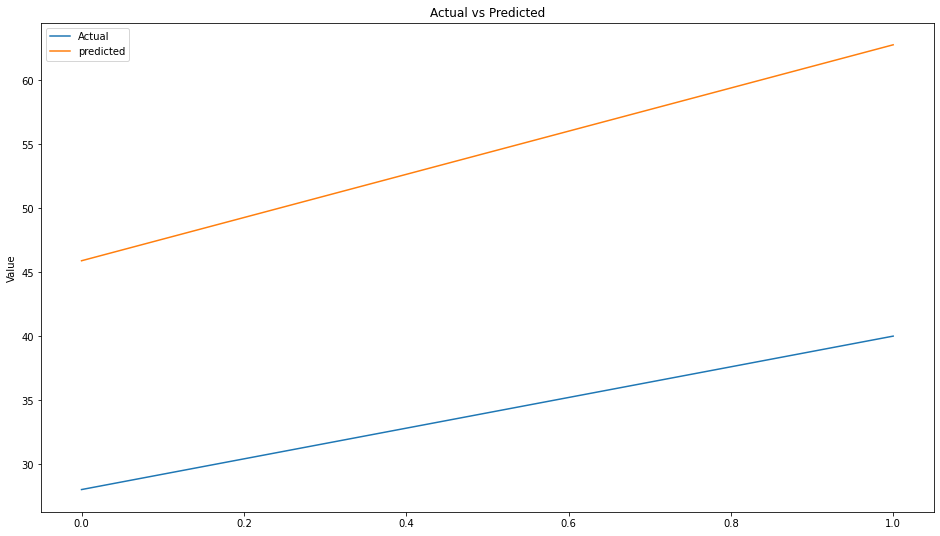

In [52]:
plt.figure(figsize=(16,9))
plt.plot( list(validate['Value'].head(2)))
plt.plot( list(pred_Inverse[0]))
plt.title("Actual vs Predicted")
plt.ylabel("Value")
plt.legend(('Actual','predicted'))
plt.show()